<a href="https://colab.research.google.com/github/Ananya22-ux/OASIS-INFOBYTE/blob/main/EDA_on_Retail_Sales_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np   # For numerical operations
import matplotlib.pyplot as plt  # For creating static, animated, and interactive visualizations
import seaborn as sns  # For statistical data visualization
from scipy import stats  # For statistical functions


In [24]:
# Load the dataset
sales_data = pd.read_csv('menu.csv')


In [25]:
# Display basic information about the dataset
print(sales_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    object 
 3   Calories                       260 non-null    int64  
 4   Calories from Fat              260 non-null    int64  
 5   Total Fat                      260 non-null    float64
 6   Total Fat (% Daily Value)      260 non-null    int64  
 7   Saturated Fat                  260 non-null    float64
 8   Saturated Fat (% Daily Value)  260 non-null    int64  
 9   Trans Fat                      260 non-null    float64
 10  Cholesterol                    260 non-null    int64  
 11  Cholesterol (% Daily Value)    260 non-null    int64  
 12  Sodium                         260 non-null    int

In [26]:
# Check for missing values
print(sales_data.isnull().sum())

Category                         0
Item                             0
Serving Size                     0
Calories                         0
Calories from Fat                0
Total Fat                        0
Total Fat (% Daily Value)        0
Saturated Fat                    0
Saturated Fat (% Daily Value)    0
Trans Fat                        0
Cholesterol                      0
Cholesterol (% Daily Value)      0
Sodium                           0
Sodium (% Daily Value)           0
Carbohydrates                    0
Carbohydrates (% Daily Value)    0
Dietary Fiber                    0
Dietary Fiber (% Daily Value)    0
Sugars                           0
Protein                          0
Vitamin A (% Daily Value)        0
Vitamin C (% Daily Value)        0
Calcium (% Daily Value)          0
Iron (% Daily Value)             0
dtype: int64


In [27]:
# Identify numeric and categorical columns
numeric_columns = sales_data.select_dtypes(include=[np.number]).columns
categorical_columns = sales_data.select_dtypes(include=['object']).columns

In [28]:
# Handle missing values in numeric columns
for col in numeric_columns:
    sales_data[col].fillna(sales_data[col].mean(), inplace=True)

In [29]:
# Handle missing values in categorical columns
for col in categorical_columns:
    sales_data[col].fillna(sales_data[col].mode()[0], inplace=True)


In [30]:
# Display descriptive statistics
print(sales_data.describe())


          Calories  Calories from Fat   Total Fat  Total Fat (% Daily Value)  \
count   260.000000         260.000000  260.000000                 260.000000   
mean    368.269231         127.096154   14.165385                  21.815385   
std     240.269886         127.875914   14.205998                  21.885199   
min       0.000000           0.000000    0.000000                   0.000000   
25%     210.000000          20.000000    2.375000                   3.750000   
50%     340.000000         100.000000   11.000000                  17.000000   
75%     500.000000         200.000000   22.250000                  35.000000   
max    1880.000000        1060.000000  118.000000                 182.000000   

       Saturated Fat  Saturated Fat (% Daily Value)   Trans Fat  Cholesterol  \
count     260.000000                     260.000000  260.000000   260.000000   
mean        6.007692                      29.965385    0.203846    54.942308   
std         5.321873                   

In [31]:
# Convert 'date' column to datetime and set as index
if 'date' in sales_data.columns:
    # First, check if 'date' is already datetime
    if not pd.api.types.is_datetime64_any_dtype(sales_data['date']):
        # If it's not datetime, try to convert it
        try:
            sales_data['date'] = pd.to_datetime(sales_data['date'])
        except Exception as e:
            print(f"Error converting date column: {e}")
            print("Please check the format of your date column.")

    # Now set the 'date' column as index
    sales_data.set_index('date', inplace=True)
else:
    print("No 'date' column found in the dataset.")
    print("Please check your column names.")

No 'date' column found in the dataset.
Please check your column names.


In [32]:
# Plot total sales over time
if 'sales' in sales_data.columns:
    plt.figure(figsize=(12, 6))
    sales_data['sales'].plot()
    plt.title('Sales Over Time')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.show()
else:
    print("No 'sales' column found in the dataset.")
    print("Please check your column names.")

No 'sales' column found in the dataset.
Please check your column names.


In [33]:
# Calculate top customers by total sales
if 'customer_id' in sales_data.columns and 'sales' in sales_data.columns:
    try:
        top_customers = sales_data.groupby('customer_id')['sales'].sum().nlargest(10)
        print("Top 10 Customers by Total Sales:")
        print(top_customers)
    except Exception as e:
        print(f"Error calculating top customers: {e}")
else:
    print("Missing required columns ('customer_id' or 'sales').")
    print("Please check your column names.")

Missing required columns ('customer_id' or 'sales').
Please check your column names.


In [19]:
# Calculate top products by total sales
if 'product_id' in sales_data.columns and 'sales' in sales_data.columns:
    try:
        top_products = sales_data.groupby('product_id')['sales'].sum().nlargest(10)
        print("Top 10 Products by Total Sales:")
        print(top_products)
    except Exception as e:
        print(f"Error calculating top products: {e}")

else:
    print("Missing required columns ('product_id' or 'sales').")
    print("Please check your column names.")

Missing required columns ('product_id' or 'sales').
Please check your column names.


In [34]:
# Plot bar chart of top customers
if 'top_customers' in locals() and not top_customers.empty:
    try:
        plt.figure(figsize=(12, 6))
        top_customers.plot(kind='bar')
        plt.title('Top 10 Customers by Total Sales')
        plt.xlabel('Customer ID')
        plt.ylabel('Total Sales')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Error plotting top customers: {e}")
        print("Please check your data and ensure matplotlib is properly installed.")
else:
    print("No top customers data available for plotting.")
    print("Make sure you've successfully calculated top_customers earlier in your code.")

No top customers data available for plotting.
Make sure you've successfully calculated top_customers earlier in your code.


In [35]:
# Plot bar chart of top products
if 'top_products' in locals() and not top_products.empty:
    try:
        plt.figure(figsize=(12, 6))
        ax = top_products.plot(kind='bar')
        plt.title('Top 10 Products by Total Sales')
        plt.xlabel('Product ID')
        plt.ylabel('Total Sales')

        # Rotate x-axis labels for better readability
        plt.xticks(rotation=45, ha='right')

        # Add value labels on top of each bar
        for i, v in enumerate(top_products):
            ax.text(i, v, f'${v:,.0f}', ha='center', va='bottom')

        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Error plotting top products: {e}")
        print("Please check your data and ensure matplotlib is properly installed.")
else:
    print("No top products data available for plotting.")
    print("Make sure you've successfully calculated top_products earlier in your code.")

No top products data available for plotting.
Make sure you've successfully calculated top_products earlier in your code.


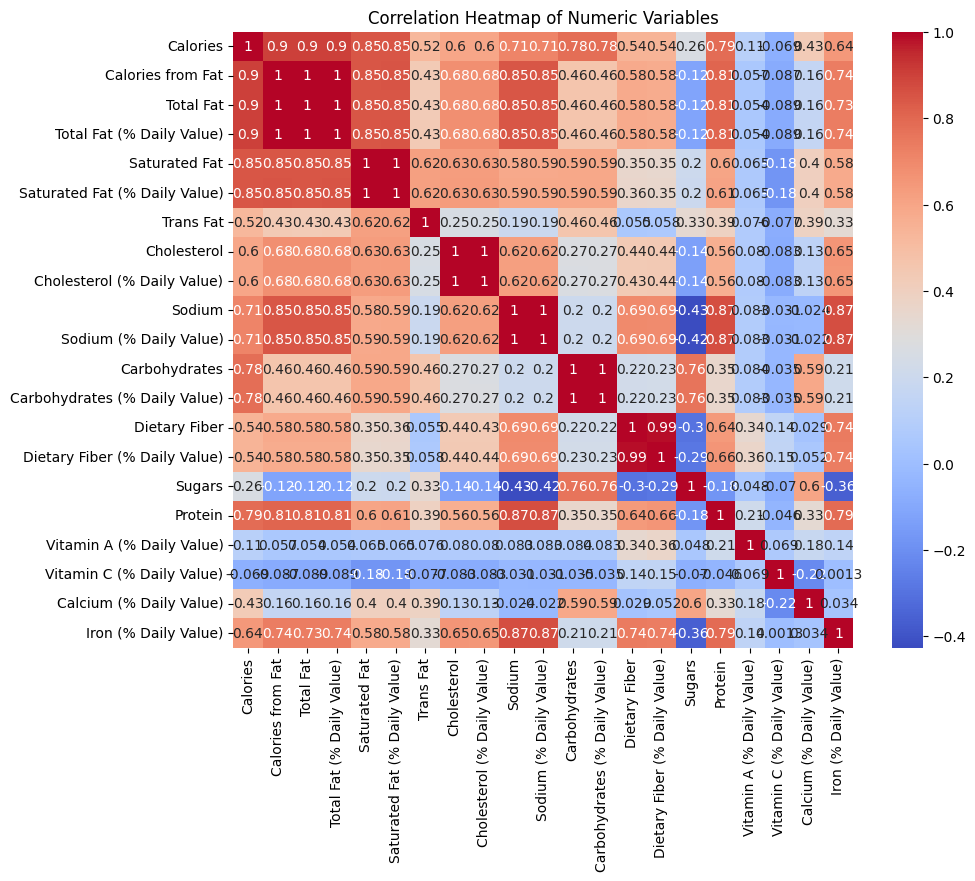

In [36]:
# Create correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(sales_data[numeric_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()


In [38]:
# Print key findings
print("Key Findings:")

# Total sales
if 'sales' in sales_data.columns:
    try:
        total_sales = sales_data['sales'].sum()
        print(f"1. The total sales for the period: ${total_sales:,.2f}")
    except Exception as e:
        print(f"Error calculating total sales: {e}")

# Best-selling product
if 'top_products' in locals() and not top_products.empty:
    try:
        best_product_id = top_products.index[0]
        best_product_sales = top_products.iloc[0]
        print(f"2. The best-selling product (ID {best_product_id}) generated ${best_product_sales:,.2f} in sales")
    except Exception as e:
        print(f"Error identifying best-selling product: {e}")
else:
    print("2. Data for best-selling product not available")

# Top customer
if 'top_customers' in locals() and not top_customers.empty:
    try:
        top_customer_id = top_customers.index[0]
        top_customer_sales = top_customers.iloc[0]
        print(f"3. The top customer (ID {top_customer_id}) spent ${top_customer_sales:,.2f}")
    except Exception as e:
        print(f"Error identifying top customer: {e}")
else:
    print("3. Data for top customer not available")

Key Findings:
2. Data for best-selling product not available
3. Data for top customer not available
